# Diabetes classification using KNN algorithm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dfx = pd.read_csv("./Downloads/Diabetes_XTrain.csv")
dfy = pd.read_csv("./Downloads/Diabetes_YTrain.csv")
z = dfx.join(dfy)
z

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0
...,...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23,0
572,7,187,68,39,304,37.7,0.254,41,1
573,2,122,60,18,106,29.8,0.717,22,0
574,4,154,72,29,126,31.3,0.338,37,0


In [9]:
X = dfx.values
Y = dfy.values.reshape((-1,))

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

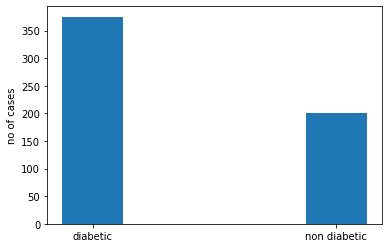

In [117]:
y = np.unique(Y,return_counts = True)
y_pos = np.arange(len(["diabetic","non diabetic"]))
value = y[1]

plt.bar(y_pos,value,width = 0.25,)
plt.xticks(y_pos,["diabetic","non diabetic"])
plt.ylabel("no of cases")
plt.show()

# algorithm 

In [17]:
def distance(X,x):
    return np.sqrt(sum(X-x)**2)

In [59]:
def prediction_by_knn(X_train,Y_train,Xtest,k = 21):
    
    vals = [];
    for i in range(X_train.shape[0]):
        d = distance(X_train[i],Xtest)
        vals.append((d,Y_train[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)

    new_vals = np.unique(vals[:,1],return_counts = True)
    
    index = new_vals[1].argmax()
    predicted_class = new_vals[0][index]
    
    return predicted_class


In [50]:
x = pd.read_csv("./Downloads/Diabetes_Xtest.csv")
Xtest = x.values  
Xtest

array([[0.00e+00, 1.80e+02, 9.00e+01, ..., 3.65e+01, 3.14e-01, 3.50e+01],
       [2.00e+00, 9.30e+01, 6.40e+01, ..., 3.80e+01, 6.74e-01, 2.30e+01],
       [2.00e+00, 1.14e+02, 6.80e+01, ..., 2.87e+01, 9.20e-02, 2.50e+01],
       ...,
       [0.00e+00, 1.62e+02, 7.60e+01, ..., 4.96e+01, 3.64e-01, 2.60e+01],
       [1.20e+01, 8.40e+01, 7.20e+01, ..., 2.97e+01, 2.97e-01, 4.60e+01],
       [0.00e+00, 9.40e+01, 0.00e+00, ..., 0.00e+00, 2.56e-01, 2.50e+01]])

In [62]:
def predictor(X_train,Y_train,X_test):
    prediction = [];
    for i in range(X_test.shape[0]):
        x = X_test[i]
        
        v = prediction_by_knn(X_train,Y_train,x)
        prediction.append(int(v))
    prediction = np.array(prediction)
    
    return prediction

In [63]:
predicted_diabetes_class = predictor(X,Y,Xtest)
predicted_diabetes_class

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
k = predicted_diabetes_class.reshape((-1,1))
k

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [118]:
k = pd.DataFrame(k)
result = x.join(k).rename(columns = {0 : "predicted diabetic class"})
result.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,predicted diabetic class
0,0,180,90,26,90,36.5,0.314,35,0
1,2,93,64,32,160,38.0,0.674,23,0
2,2,114,68,22,0,28.7,0.092,25,0
3,13,76,60,0,0,32.8,0.180,41,0
4,1,80,74,11,60,30.0,0.527,22,0


In [70]:
result.to_csv("prediction of diabetes.csv")